#  Business Context :

Jai Kisan is a rural-focused fintech that aims to bridge the credit gap in the rural market. Currently, 80% of rural individuals and businesses find it difficult to access formal credit and the data science team at Jai Kisan is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

Jai Kisan deploys formal credit in the rural economy via two main financial instruments:

1.Buy Now, Pay Later: Where a customer can avail credit at the point of sale to purchase goods.

2.Supply Chain Financing: Where a business (partnered with Jai Kisan) can finance invoices and/or purchase orders to bridge the gap in payable and receivable credit cycles.

This case study will focus on the underwriting process behind Supply Chain Financing.

# Problem Statement

Given a set of attributes for an MSME/ Individual, determine if a credit line should be extended to a business. 
If so, what should the repayment terms be in business recommendations?

# Column Profiling:

* loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

* term : The number of payments on the loan. Values are in months and can be either 36 or 60.

* int_rate : Interest Rate on the loan

* installment : The monthly payment owed by the borrower if the loan originates.

* grade : JaiKisan assigned loan grade

* sub_grade : JaiKisan assigned loan subgrade

* emp_title :The job title supplied by the Borrower when applying for the loan.*

* emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

* home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
* annual_inc : The self-reported annual income provided by the borrower during registration.

* verification_status : Indicates if income was verified by JaiKisan, not verified, or if the income source was verified
* issue_d : The month which the loan was funded

* loan_status : Current status of the loan - Target Variable

* purpose : A category provided by the borrower for the loan request.

* title : The loan title provided by the borrower

* zip_code : The first 3 numbers of the zip code provided by the borrower in the loan application.

* addr_state : The state provided by the borrower in the loan application

* dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested JaiKisan loan, divided by the borrower’s self-reported monthly income.

* earliest_cr_line :The month the borrower's earliest reported credit line was opened

* open_acc : The number of open credit lines in the borrower's credit file.

* pub_rec : Number of derogatory public records

* revol_bal : Total credit revolving balance

* revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

* total_acc : The total number of credit lines currently in the borrower's credit file

* initial_list_status : The initial listing status of the loan. Possible values are – W, F

* application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers

* mort_acc : Number of mortgage accounts.

* pub_rec_bankruptcies : Number of public record bankruptcies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(context="notebook", style = 'darkgrid' , color_codes=True)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix,roc_curve,plot_precision_recall_curve
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_precision_recall_curve
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv('Jaikissan.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  int64  
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377727 non-null  object 
 8   home_ownership        396028 non-null  object 
 9   annual_inc            396028 non-null  float64
 10  verification_status   396028 non-null  object 
 11  issue_d               396028 non-null  object 
 12  loan_status           396028 non-null  object 
 13  purpose               396028 non-null  object 
 14  title                 394263 non-null  object 
 15  

In [4]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960280e+05,396017.000000,396017.000000,396017.000000,3.960170e+05,395741.000000,396017.000000,358223.000000,395482.000000
mean,14113.888089,13.639400,431.849698,7.420327e+04,17.379669,11.311219,0.178197,1.584461e+04,53.792135,25.414853,1.814010,0.121652
std,8357.441341,4.472157,250.727790,6.163776e+04,18.019334,5.137635,0.530678,2.059203e+04,24.452171,11.886967,2.147947,0.356179
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [5]:
df.shape

(396030, 27)

In [6]:
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377727,396028,396028,396028,396028,396028,394263,396017,396017,396017,396017
unique,2,7,35,173102,11,6,3,115,2,14,48785,684,2,3,393687
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Fully Paid,debt_consolidation,Debt consolidation,Oct-00,f,INDIVIDUAL,USS SmithFPO AP 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318356,234505,152470,3017,238054,395306,8


In [7]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle GatewayMendozaberg, OK 22690"
1,8000,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347Loganmouth, SD 05113"
2,15600,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269New Sabrina, WV 05113"
3,7200,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid FordDelacruzside, MA 00813"
4,24375,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna RoadsGreggshire, VA 11650"


In [8]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18303
home_ownership              2
annual_inc                  2
verification_status         2
issue_d                     2
loan_status                 2
purpose                     2
title                    1767
dti                        13
earliest_cr_line           13
open_acc                   13
pub_rec                    13
revol_bal                  13
revol_util                289
total_acc                  13
initial_list_status        13
application_type           13
mort_acc                37807
pub_rec_bankruptcies      548
address                    13
dtype: int64

In [9]:
numeric_col = df.select_dtypes(include=[np.number]).columns
categorical_col = df.select_dtypes(exclude=[np.number]).columns
print(numeric_col,categorical_col)

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object') Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')


In [10]:
# Catgerocial colums to Upper 
for i in categorical_col:
    df[i]=df[i].str.lower()
    

In [11]:
#Removing null values
df=df.dropna()

* As We have large enough data for our analysis , We can drop the data with null values 

In [12]:
# Checking duplicate values
if (df.duplicated().sum() ==0):
    print("There are no duplicate values in given data")
else:
    print("There are duplicate values in given data")

There are no duplicate values in given data


In [13]:
# Checking Unique Values:
df.nunique()

loan_amnt                 1388
term                         2
int_rate                   265
installment              48696
grade                        7
sub_grade                   35
emp_title               133719
emp_length                  11
home_ownership               6
annual_inc               21339
verification_status          3
issue_d                     58
loan_status                  2
purpose                     14
title                    26552
dti                       4213
earliest_cr_line           661
open_acc                    60
pub_rec                     20
revol_bal                53310
revol_util                1155
total_acc                  117
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 334132
dtype: int64

#### Observations:

* Given Data contains details of 396030 loan transactions
* Loan amount taken is in range [500,40000] with an averge of 12,000
* Intrest rate is in range [5,30] with an average of 13.3%
* Most of the loans are of 36 Months term
* Most of the customers who has taken loan are Grade B officers
* Most of the customers have employment tenure of 10+ Years
* Highest amount of loans are issued in the month of Octoer 2014
* Most amounts are taken for Debt consolidation
* There are null values and no duplicates in the given Data

# Univariate Analysis:

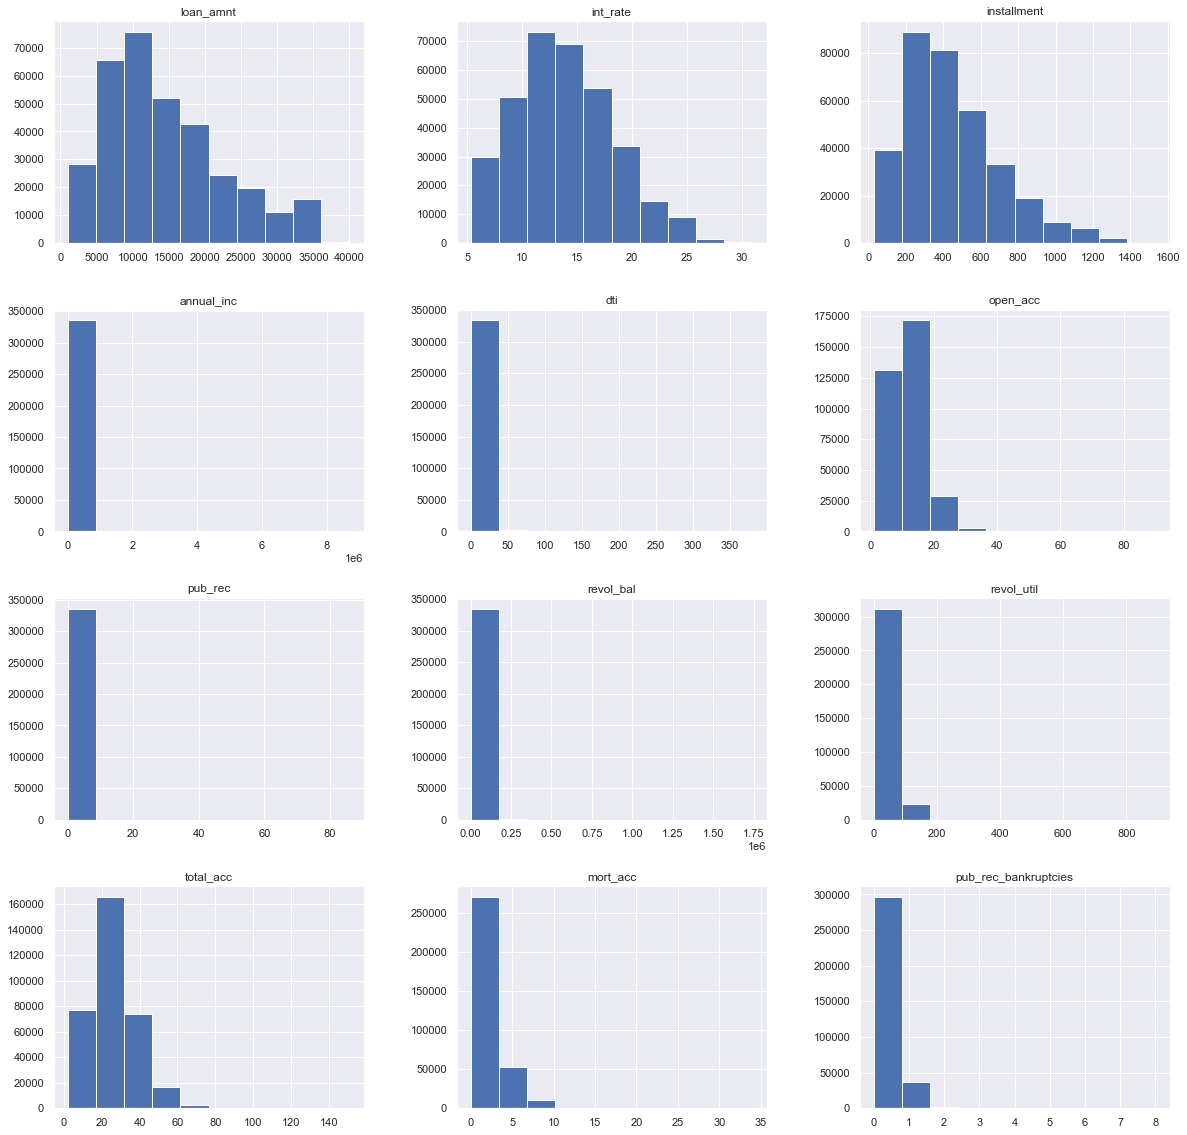

In [14]:
df.hist(figsize = (20,20))
plt.show()

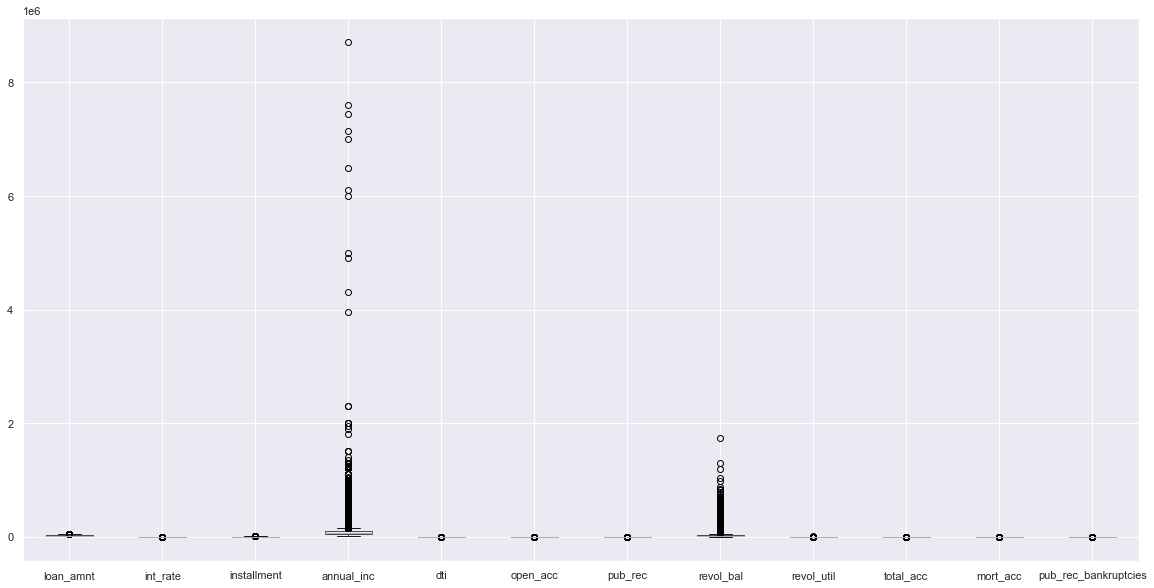

In [15]:
df.boxplot(figsize = (20,10))
plt.show()

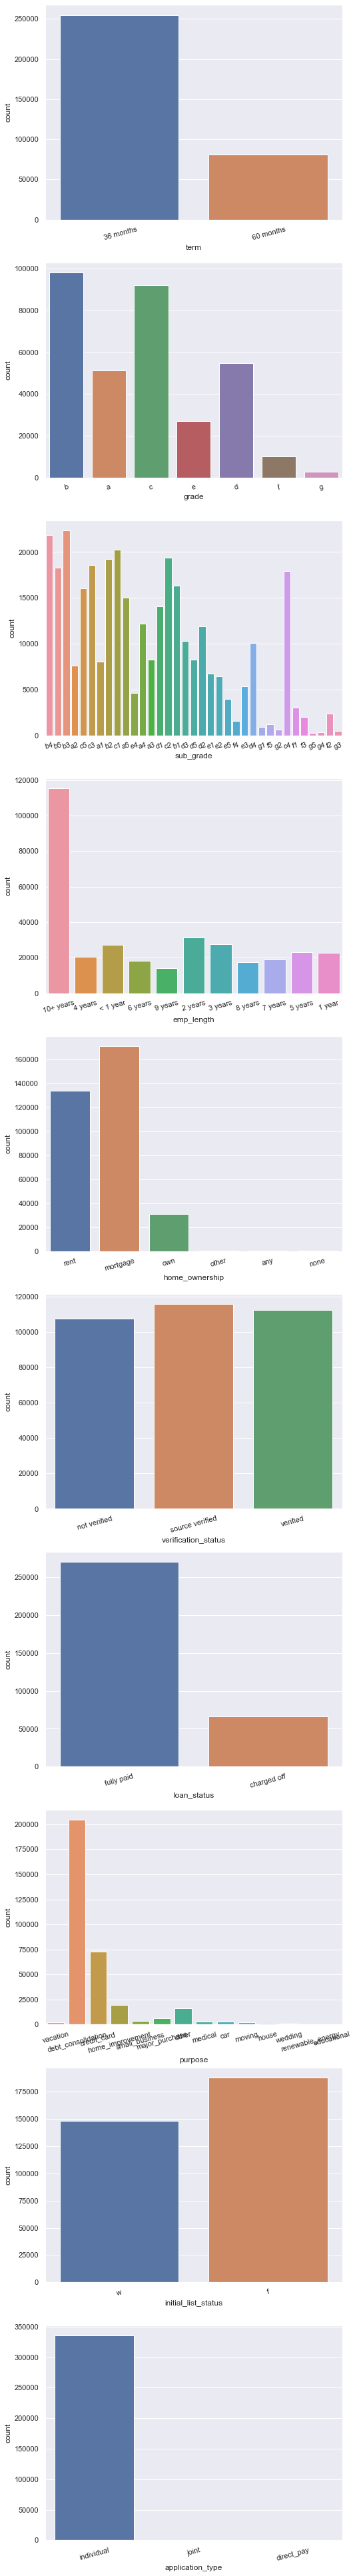

In [17]:
cat_col=['term', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'verification_status', 'loan_status',
       'purpose', 'initial_list_status',
       'application_type']
fig, axes = plt.subplots(len(cat_col), figsize=(8, 70))
for i in range(len(cat_col)):
    g=sns.countplot(df[cat_col[i]],ax=axes[i])
    g.set_xticklabels(g.get_xticklabels(),rotation=15)

In [18]:
df['emp_title'].value_counts(normalize=True).head(10)

manager             0.016712
teacher             0.016072
registered nurse    0.007768
supervisor          0.007652
sales               0.007021
driver              0.006783
owner               0.006428
rn                  0.006151
project manager     0.005249
office manager      0.004862
Name: emp_title, dtype: float64

In [19]:
df['title'].value_counts(normalize=True).head(10)

debt consolidation           0.465779
credit card refinancing      0.144934
home improvement             0.045942
other                        0.035712
major purchase               0.013696
consolidation                0.013652
business                     0.007908
medical expenses             0.007578
credit card consolidation    0.006107
car financing                0.006038
Name: title, dtype: float64

In [20]:
df['application_type'].value_counts(normalize=True)

individual    0.998345
joint         0.000926
direct_pay    0.000729
Name: application_type, dtype: float64

In [21]:
df['term'].value_counts(normalize=True)

 36 months    0.758555
 60 months    0.241445
Name: term, dtype: float64

In [22]:
df['grade'].value_counts(normalize=True)

b    0.291803
c    0.274554
d    0.162679
a    0.152211
e    0.080758
f    0.030275
g    0.007721
Name: grade, dtype: float64

In [23]:
def home(i):
    if i=='other' or i=='any':
        return 'none'
    else:
        return i

In [24]:
df['home_ownership']=df['home_ownership'].apply(home)

In [25]:
df['home_ownership'].value_counts(normalize=True)

mortgage    0.508639
rent        0.398750
own         0.092435
none        0.000176
Name: home_ownership, dtype: float64

In [26]:
df['loan_status'].value_counts(normalize=True)

fully paid     0.802568
charged off    0.197432
Name: loan_status, dtype: float64

In [27]:
df['initial_list_status'].value_counts(normalize=True)

f    0.558407
w    0.441593
Name: initial_list_status, dtype: float64

In [28]:
df['verification_status'].value_counts(normalize=True)

source verified    0.344441
verified           0.335018
not verified       0.320541
Name: verification_status, dtype: float64

In [29]:
df[['issued_month','issued_year']] = df.issue_d.str.split("-",expand=True)

In [30]:
def monthname(i):
    i=i.upper()
    if i=='JAN':
        return 'January'
    elif i=='FEB':
        return 'February'
    elif i=='MAR':
        return 'March'
    elif i=='APR':
        return 'April'
    elif i=='JUN':
        return 'June'
    elif i=='JUL':
        return 'July'
    elif i=='AUG':
        return 'August'
    elif i=='SEP':
        return 'September'
    elif i=='OCT':
        return 'October'
    elif i=='NOV':
        return 'November'
    else:
        return 'December'


In [31]:
def year(i):
    return str('20'+str(i))
    

In [32]:
df['issued_month']=df['issued_month'].apply(monthname)
df['issued_year']=df['issued_year'].apply(year)

In [33]:
df['issued_year'].value_counts(normalize=True)

2014    0.289876
2013    0.271607
2015    0.265595
2012    0.099099
2016    0.073823
Name: issued_year, dtype: float64

In [34]:
df['issued_month'].value_counts(normalize=True)

December     0.153250
October      0.109365
July         0.104262
April        0.086412
November     0.085986
January      0.085066
August       0.083946
March        0.077607
June         0.077268
September    0.069154
February     0.067684
Name: issued_month, dtype: float64

# BI-Variate Analysis

In [35]:
c=['loan_amnt', 'int_rate', 'installment', 'annual_inc','dti', 'earliest_cr_line', 'open_acc', 'revol_bal','revol_util', 'total_acc']

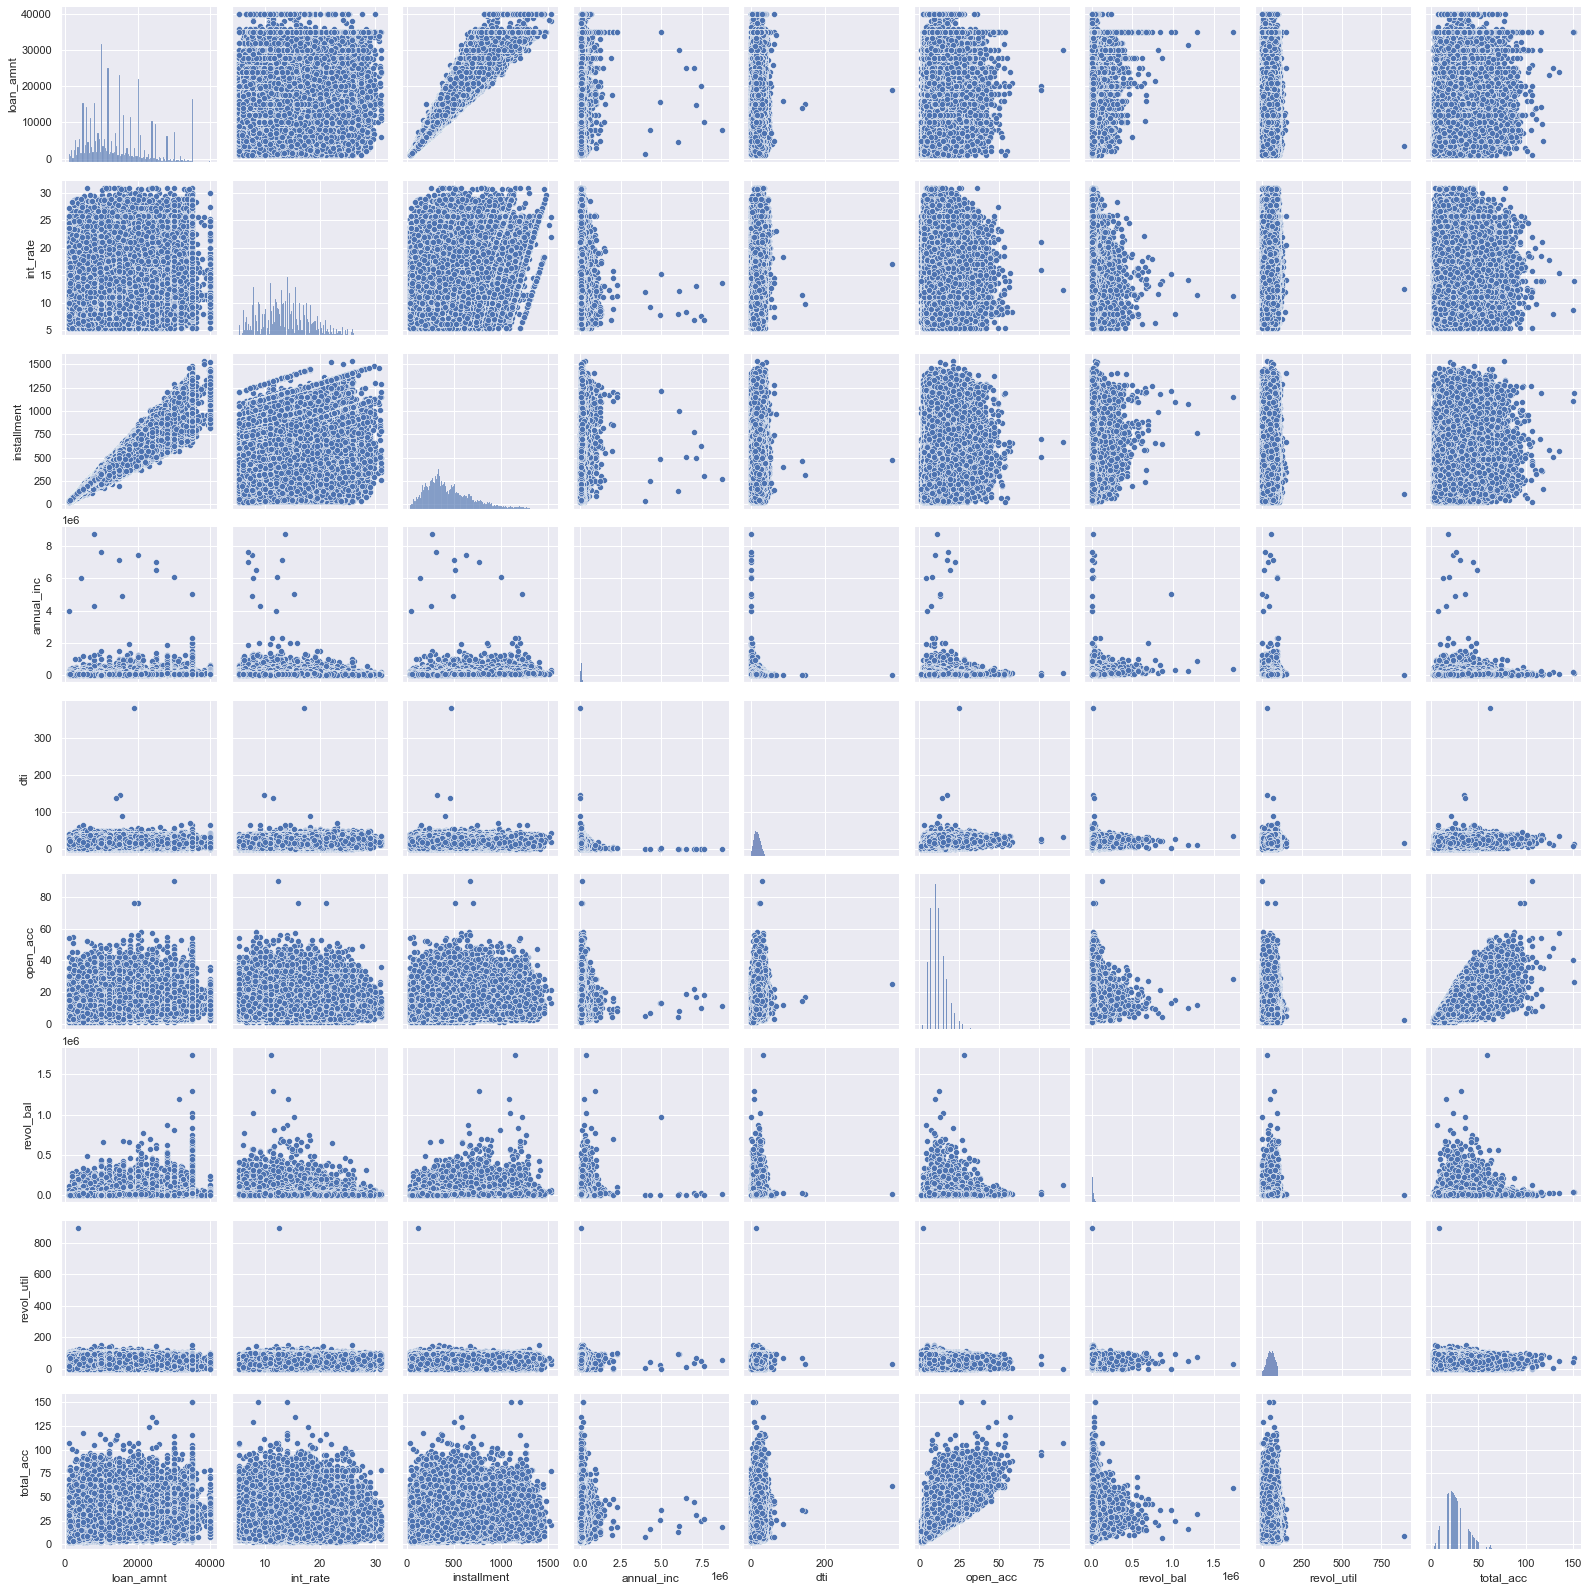

In [36]:
sns.pairplot(df[c])

<AxesSubplot:>

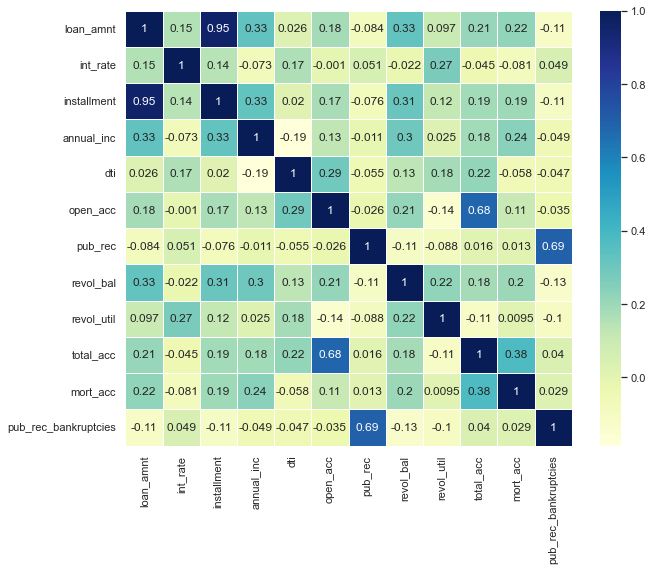

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap ="YlGnBu", annot=True,linewidths = 0.5)

In [38]:
c=['loan_amnt', 'int_rate', 'installment', 'annual_inc','dti', 'open_acc', 'revol_bal','revol_util', 'total_acc']

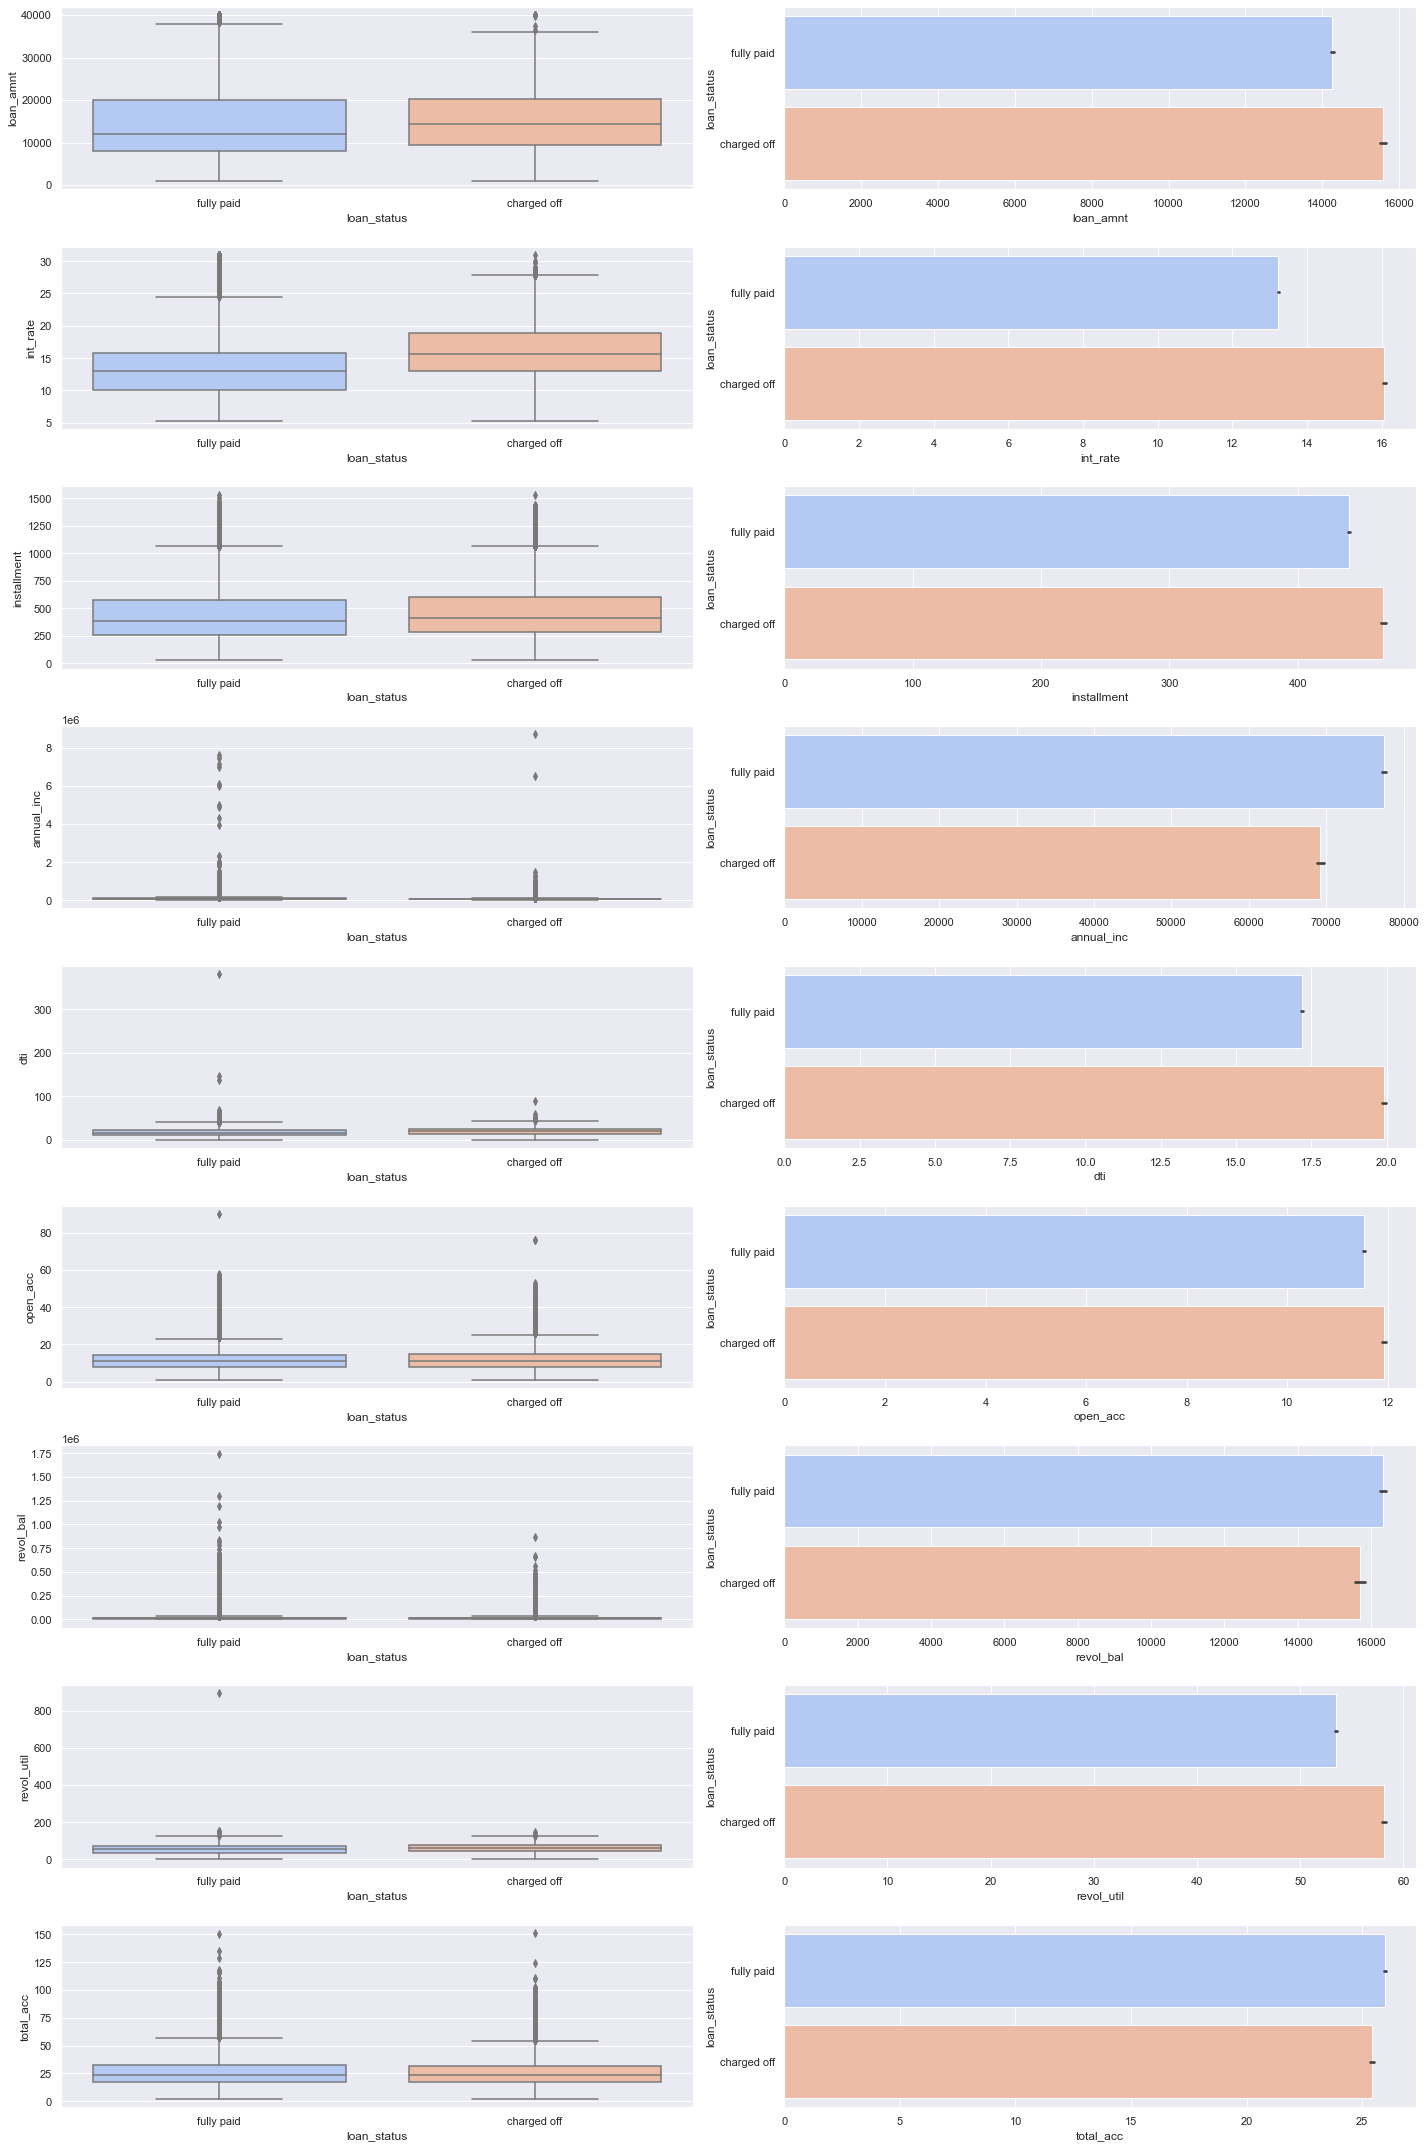

In [39]:
fig, axes = plt.subplots(len(c), 2, figsize=(20,30))
for i in range(len(c)):
    sns.boxplot(df['loan_status'],df[c[i]],ax=axes[i,0],palette ='coolwarm')
    sns.barplot(df[c[i]],df['loan_status'],ax=axes[i,1],palette ='coolwarm')
fig.tight_layout()

In [40]:
cols1=['term', 'grade', 'emp_length','home_ownership', 'verification_status','purpose', 'initial_list_status','application_type']

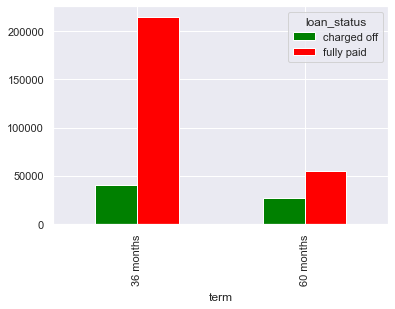

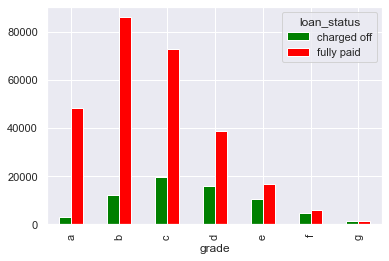

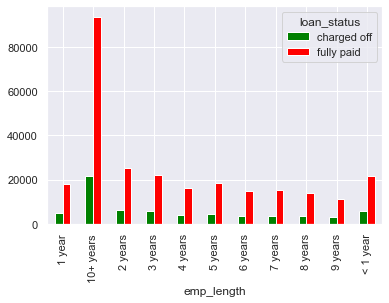

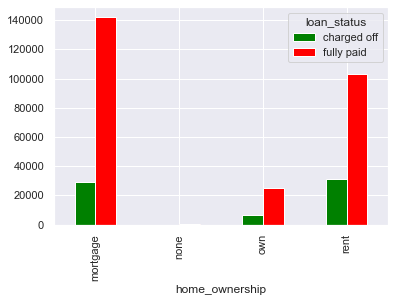

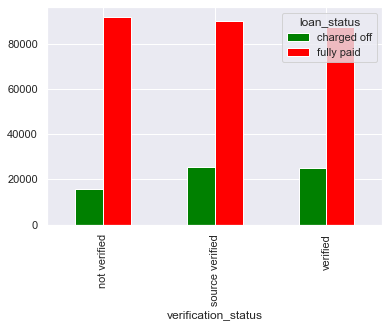

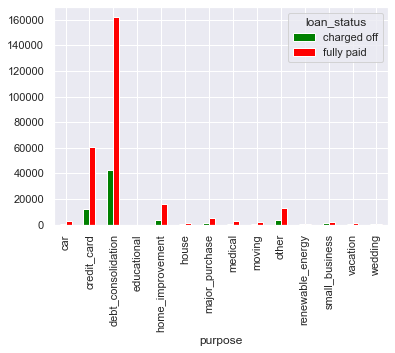

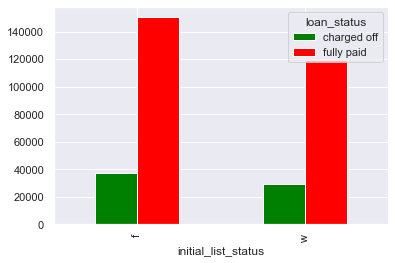

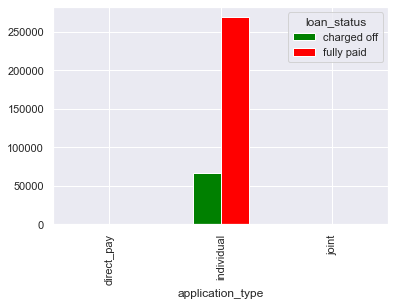

In [41]:
for i in cols1:
    pd.crosstab(df[i], df['loan_status']).plot.bar(color=['green','red'])

In [42]:
print('*********************************************')
print('\n')
for i in cols1:

    print(pd.crosstab(df[i], df['loan_status'],normalize=True))
    print('\n')
    print('*********************************************')
    print('\n')

*********************************************


loan_status  charged off  fully paid
term                                
 36 months      0.118753    0.639802
 60 months      0.078679    0.162766


*********************************************


loan_status  charged off  fully paid
grade                               
a               0.009081    0.143129
b               0.035604    0.256198
c               0.057888    0.216667
d               0.047184    0.115496
e               0.030751    0.050006
f               0.013160    0.017114
g               0.003764    0.003957


*********************************************


loan_status  charged off  fully paid
emp_length                          
1 year          0.013946    0.053377
10+ years       0.063968    0.279026
2 years         0.018791    0.074678
3 years         0.016561    0.065159
4 years         0.012094    0.048408
5 years         0.013655    0.054749
6 years         0.010680    0.044069
7 years         0.011058    0.044820
8

<AxesSubplot:xlabel='int_rate', ylabel='loan_amnt'>

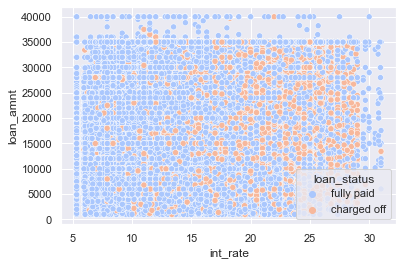

In [43]:
sns.scatterplot(x='int_rate',y='loan_amnt',hue='loan_status',data=df,palette ='coolwarm')   

<AxesSubplot:xlabel='annual_inc', ylabel='loan_amnt'>

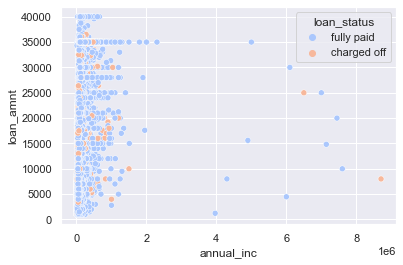

In [44]:
sns.scatterplot(x='annual_inc',y='loan_amnt',hue='loan_status',data=df,palette ='coolwarm')   

<AxesSubplot:xlabel='dti', ylabel='loan_amnt'>

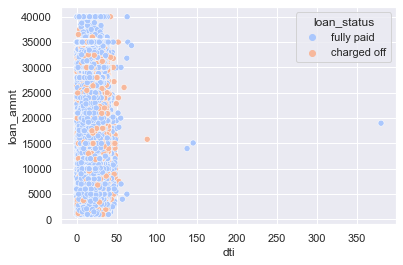

In [45]:
sns.scatterplot(x='dti',y='loan_amnt',hue='loan_status',data=df,palette ='coolwarm')  

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

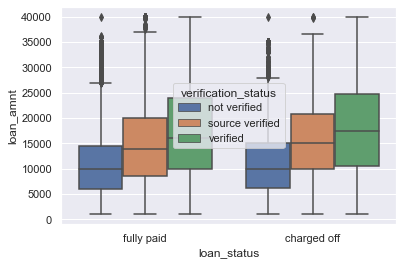

In [46]:
sns.boxplot(x="loan_status", y="loan_amnt", hue='verification_status', data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

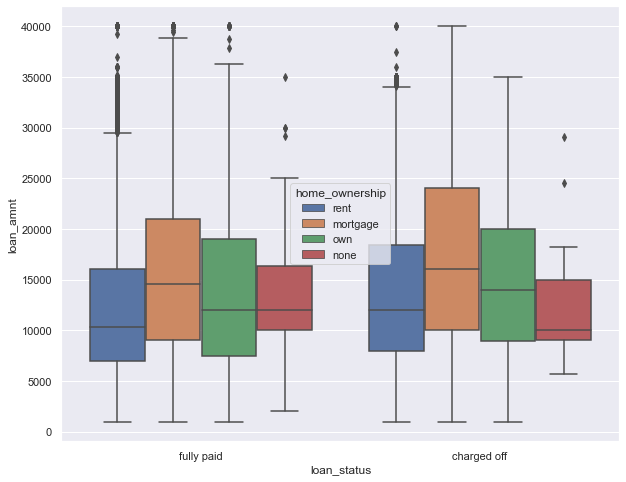

In [47]:
f, ax = plt.subplots(figsize =(10,8))
sns.boxplot(x="loan_status", y="loan_amnt", hue='home_ownership', data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

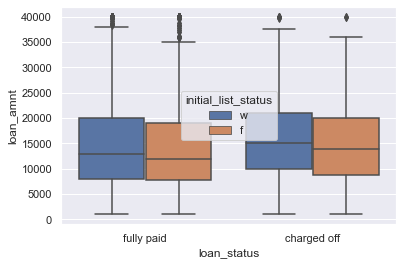

In [48]:
sns.boxplot(x="loan_status", y="loan_amnt", hue='initial_list_status', data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

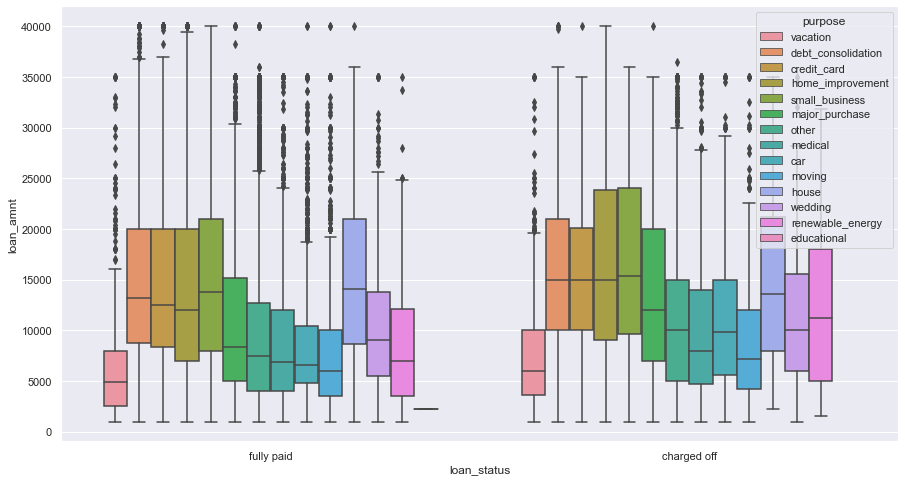

In [49]:
f, ax = plt.subplots(figsize =(15,8))
sns.boxplot(x="loan_status", y="loan_amnt", hue='purpose', data=df)

### Illustrate the insights based on EDA
* Comments on range of attributes, outliers of various attributes
* Comments on the distribution of the variables and relationship between them
* Comments for each univariate and bivariate plots

#### Observations :

* There are lots of outliers in the given data
* Almost 76 percent of loans have term tenure of 36 months and 24 percent of loans have tenure of 60 months
* More than 50 percent of loans are taken by Grade B and C employees
* Most of the loans are taken by Managers and teachers
* Whooping 46 percent of loans are taken for Debt consolidation and  another 15 percent of loans are taken for Credit Card refinancing
* 99.8 percent of loan applicant type id Individual
* Almost 51 percent of customers lives in mortgaged houses and 40 percent of customers live in rented houses and another 1 percent of customers have own house
* 80 Percent of the loans are fully paid and 20 percent of loans are charged off.Even though the percent of loans that are charged off are low compared to Fully paid , it will create a high impact Bank Revenue/Profits/reputation
* Around 56 percent of loans are given Fractional amount of loans and 44 percent of the given whole loan amount they have requested
* 70 percent of Customer's Income sources are verified and 30 of customers income source is not verified
* Most of the loans are issued in years 2014,2013 and 2015
* Loan_amount has linear relationship with installment and highly correlated with each other
* total_acc & open_acc , pub_rec & pub_rec_bankrupties are positively correlated with each other
* annual_inc ,int_rate,revol_bal,open_acc,total_acc,mort_acc are weakly positively correlated with loan_amount
* Loans with High loan amount with high interest and high installments rate are more likely to get Charged off
* dti of loans are high for Charged off loans compared to Fully paid loans
* annual income of Charged off loans is low compared to Fully paid loans
* Large number of charged off loans are from Grade C and D officers
* loans with Loan term of 60 months are more likely to get charged off
* Loans with home ownership as rent and Mortgage are likely to get charged off
* Customers having  more number of open credit accounts and revolving utilization rate  are more likely to charged off

# 2. Data Preprocessing

### 2.1 Duplicate value check

In [50]:
# Checking duplicate values
if (df.duplicated().sum() ==0):
    print("There are no duplicate values in given data")
else:
    print("There are duplicate values in given data")

There are no duplicate values in given data


### 2.2 Missing value treatment

In [51]:
 df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
issued_month            0
issued_year             0
dtype: int64

* Missing Values are already handled before, We have dropped the rows having null value as we have suffcient data for analysis

### 2.3 Outlier treatment

In [52]:
df1=df

In [53]:
#Removing outliers
cols=['annual_inc','revol_bal']
for i in cols:
    q3=df1[i].quantile(0.75)
    q1=df1[i].quantile(0.25)
    iqr=q3-q1
    df1=df1[(df1[i]>q1-(1.5*iqr)) & (df1[i]<q3+(1.5*iqr))]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'loan_amnt'),
  Text(1, 0, 'int_rate'),
  Text(2, 0, 'installment'),
  Text(3, 0, 'annual_inc'),
  Text(4, 0, 'dti'),
  Text(5, 0, 'open_acc'),
  Text(6, 0, 'pub_rec'),
  Text(7, 0, 'revol_bal'),
  Text(8, 0, 'revol_util'),
  Text(9, 0, 'total_acc'),
  Text(10, 0, 'mort_acc'),
  Text(11, 0, 'pub_rec_bankruptcies')])

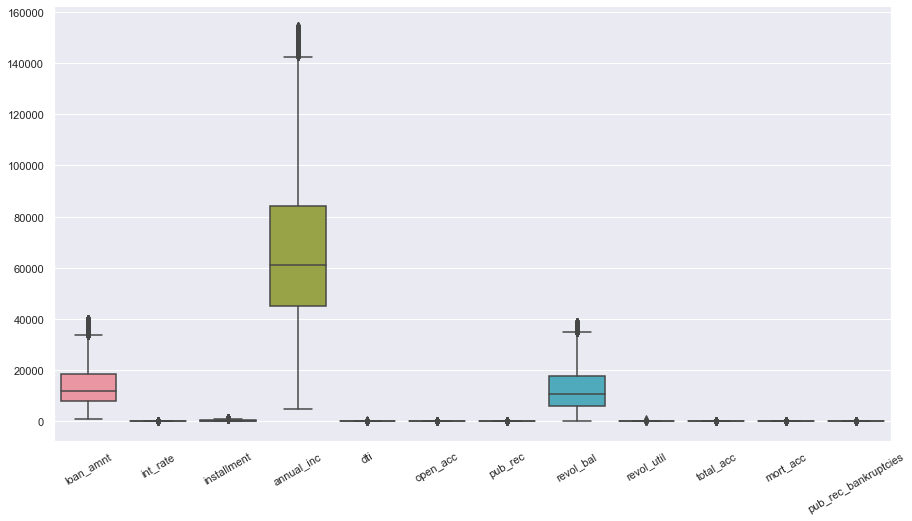

In [54]:
f, ax = plt.subplots(figsize =(15,8))
sns.boxplot(data=df1[numeric_col])
plt.xticks(rotation=30)   

### 2.4 Feature engineering and Data preparation for modeling

In [55]:
df1.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'issued_month',
       'issued_year'],
      dtype='object')

In [56]:
#Removing unnecessary columns such as address,issued
df1=df1.drop(labels=['sub_grade','title','address','issue_d','earliest_cr_line','issued_month','issued_year'], axis=1)

* As We have high correlation between Loan amount and installment ,We can keep one of them and drop the other,So We can drop the installment column

In [57]:
df1=df1.drop('installment', axis=1)

In [58]:
categorical_col = df1.select_dtypes(exclude=[np.number]).columns
numerical_col = df1.select_dtypes(include=[np.number]).columns

In [59]:
print(categorical_col)
print(numerical_col)

Index(['term', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'initial_list_status',
       'application_type'],
      dtype='object')
Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')


### Encoding Cateogorical variables

In [60]:
for col in categorical_col:   
    if len(list(df1[col].unique())) ==2:
        lb = LabelEncoder()
        df1[col] = lb.fit_transform(df1[col])

In [61]:
df1 = pd.get_dummies(df1,columns=['application_type','verification_status'])

### Scaling Numeric variables

In [62]:
numeric_col=['loan_amnt','int_rate',  'annual_inc', 'dti', 'open_acc', 'total_acc','revol_bal', 'revol_util']

In [63]:
for i in numeric_col:
    df1[i] = StandardScaler().fit_transform(df1[[i]])

In [64]:
for i in ['pub_rec','mort_acc', 'pub_rec_bankruptcies']:
    df1[i] = np.where(df1[i] >1,1,0)

# 3.Model building

### Logistic Regresion:

 Logistic Regression is a Machine Learning method that is used to solve classification issues. It is a predictive analytic technique that is based on the probability idea. The classification algorithm Logistic Regression is used to predict the likelihood of a categorical dependent variable. 

### 3.1 Build the Logistic Regression model and comment on the model statistics

###  Logistic Regression model using Sklearn

In [65]:
Y = df1["loan_status"]
X = df1.drop(["loan_status"], axis = 1)

In [66]:
Y.value_counts()

1    243584
0     61089
Name: loan_status, dtype: int64

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=1, stratify=Y)

In [68]:
for col in categorical_col:
    if len(list(df[col].unique()))>3:
        encoder = TargetEncoder()
        X_train[col] = encoder.fit_transform(X_train[col], Y_train)
        X_test[col] = encoder.fit_transform(X_test[col], Y_test)

In [69]:
logistic = LogisticRegression()

In [70]:
logistic.fit(X_train, Y_train)

LogisticRegression()

In [71]:
logistic.intercept_

array([-5.30529355])

In [72]:
logistic.coef_

array([[-0.14638727, -0.45354274, -0.07415033,  3.31775993,  6.9379568 ,
        -1.65843662,  4.38721933,  0.12007677,  1.10011159, -0.18017083,
        -0.16534822, -0.04194411,  0.08879636, -0.14696085,  0.10597163,
         0.03909475,  0.0820631 , -0.14221902, -1.97561372, -2.57058152,
        -0.36187885, -1.55511339, -1.70957137, -1.64338933]])

In [73]:
Y_pred_train=logistic.predict(X_train)

In [74]:
print('\n')
print('Train data Results:')
print('\n')
print('====================================================================')
print('\n')
print("Sklearn model Accuracy on train data: "+str(accuracy_score(Y_train,Y_pred_train)))
print('\n')
print('------------------------------------------------------------------')
print('\n')
print('Confusion_Matrix')
print('\n')
print(confusion_matrix(Y_train,Y_pred_train))
print('\n')
print('------------------------------------------------------------------')
print('\n')
print('Classification Report')
print('\n')
print(classification_report(Y_train,Y_pred_train))
print('====================================================================')



Train data Results:




Sklearn model Accuracy on train data: 0.8133774790964068


------------------------------------------------------------------


Confusion_Matrix


[[  9552  39319]
 [  6168 188699]]


------------------------------------------------------------------


Classification Report


              precision    recall  f1-score   support

           0       0.61      0.20      0.30     48871
           1       0.83      0.97      0.89    194867

    accuracy                           0.81    243738
   macro avg       0.72      0.58      0.59    243738
weighted avg       0.78      0.81      0.77    243738



In [75]:
Y_pred = logistic.predict(X_test)

In [76]:
print('\n')
print('Test data Results:')
print('\n')
print('====================================================================')
print('\n')
print("Sklearn model Accuracy on test data: "+str(accuracy_score(Y_test,Y_pred)))
print('\n')
print('------------------------------------------------------------------')
print('\n')
print('Confusion_Matrix')
print('\n')
print(confusion_matrix(Y_test,Y_pred))
print('\n')
print('------------------------------------------------------------------')
print('\n')
print('Classification Report')
print('\n')
print(classification_report(Y_test,Y_pred))
print('====================================================================')



Test data Results:




Sklearn model Accuracy on test data: 0.8155575613358497


------------------------------------------------------------------


Confusion_Matrix


[[ 2499  9719]
 [ 1520 47197]]


------------------------------------------------------------------


Classification Report


              precision    recall  f1-score   support

           0       0.62      0.20      0.31     12218
           1       0.83      0.97      0.89     48717

    accuracy                           0.82     60935
   macro avg       0.73      0.59      0.60     60935
weighted avg       0.79      0.82      0.78     60935



* There is little high accuray in test data compared to test data From this we get to know our model is generalising well
* The model We built using SkLearn is of Accuracy of 0.82 , having less precision and recall value for class 0

###  Logistic Regression model using statmodels

In [77]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)
sm_model = sm.Logit(Y_train, X_train_sm).fit_regularized(method='l1')

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.42224996682272237
            Iterations: 193
            Function evaluations: 193
            Gradient evaluations: 193


In [78]:
print(sm_model.summary())

                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               243738
Model:                          Logit   Df Residuals:                   243713
Method:                           MLE   Df Model:                           24
Date:                Fri, 25 Feb 2022   Pseudo R-squ.:                  0.1574
Time:                        18:20:44   Log-Likelihood:            -1.0292e+05
converged:                       True   LL-Null:                   -1.2214e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -15.3698   3.36e+05  -4.57e-05      1.000   -6.59e+05    6.59e+05
loan_amnt                              -0.1437      0.00

### Insights from above stats table:

* Dependent Variable is loan_status
* Total number of observations is 2437438
* Degrees of freedon (Df Residuals) is 2437413
* There has been 24 features included in the model(Df Model:24)
* The value of Pseudo R-squared is 0.15
* coef of constant which is nothing but intercept (-15.3698 )
* coef represents strength of dependent variable with independent variable  
* The features having positive coeffient are positively related with dependent variable and The features having negitive coeffient are negitive related with dependent variable
* [0.025      0.975] gives 95% confidence interval
* P value greater than 0.05 can be treated insignicant feature and can be removed

In [79]:
pred_sm_train = sm_model.predict(X_train_sm)
pred_sm = sm_model.predict(X_test_sm)

In [80]:
pred_train=np.where(pred_sm_train>=0.5, 1,0)
pred = np.where(pred_sm>=0.5, 1,0)

In [81]:
print('\n')
print('Train data Results:')
print('\n')
print('====================================================================')
print('\n')

print("Stat model Accuracy on train data: "+str(accuracy_score(Y_train,pred_train)))
print('\n')
print('------------------------------------------------------------------')
print('\n')
print('Confusion_Matrix')
print('\n')
print(confusion_matrix(Y_train,pred_train))
print('\n')
print('------------------------------------------------------------------')
print('\n')
print('Classification Report')
print('\n')
print(classification_report(Y_train,pred_train))
print('====================================================================')



Train data Results:




Stat model Accuracy on train data: 0.8133774790964068


------------------------------------------------------------------


Confusion_Matrix


[[  9597  39274]
 [  6213 188654]]


------------------------------------------------------------------


Classification Report


              precision    recall  f1-score   support

           0       0.61      0.20      0.30     48871
           1       0.83      0.97      0.89    194867

    accuracy                           0.81    243738
   macro avg       0.72      0.58      0.59    243738
weighted avg       0.78      0.81      0.77    243738



In [82]:
print('\n')
print('Test data Results:')
print('\n')
print('====================================================================')

print('\n')
print("Stat model Accuracy on train data: "+str(accuracy_score(Y_test,pred)))
print('\n')
print('------------------------------------------------------------------')
print('\n')
print('Confusion_Matrix')
print('\n')
print(confusion_matrix(Y_test,pred))
print('\n')
print('------------------------------------------------------------------')
print('\n')
print('Classification Report')
print('\n')
print(classification_report(Y_test,pred))
print('====================================================================')



Test data Results:




Stat model Accuracy on train data: 0.8158693689997538


------------------------------------------------------------------


Confusion_Matrix


[[ 2523  9695]
 [ 1525 47192]]


------------------------------------------------------------------


Classification Report


              precision    recall  f1-score   support

           0       0.62      0.21      0.31     12218
           1       0.83      0.97      0.89     48717

    accuracy                           0.82     60935
   macro avg       0.73      0.59      0.60     60935
weighted avg       0.79      0.82      0.78     60935



* There is little high accuray in test data compared to test data even in stat models 
* Accuracy,recall and precision for both Sklearn and stat models are very close
* The model We built using statmodels is of Accuracy of 0.82 , having less precision and recall value for class 0

## Rebuliding Model again after removing with features with p value > 5

In [83]:
X_train=X_train[['loan_amnt', 'term', 'int_rate', 'grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'purpose', 'dti', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'mort_acc','application_type_individual']]

In [84]:
X_test=X_test[['loan_amnt', 'term', 'int_rate', 'grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'purpose', 'dti', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'mort_acc','application_type_individual']]

### Logistic Regression model using Sklearn¶

In [85]:
model1=logistic.fit(X_train, Y_train)

In [86]:
Y_pred = model1.predict(X_test)
Y_pred_train=model1.predict(X_train)

In [87]:
print('\n')
print('Train data Results:')
print('\n')
print('====================================================================')
print('\n')
print("Sklearn model Accuracy on train data: "+str(accuracy_score(Y_train,Y_pred_train)))
print('\n')
print('------------------------------------------------------------------')
print('\n')
print('Confusion_Matrix')
print('\n')
print(confusion_matrix(Y_train,Y_pred_train))
print('\n')
print('------------------------------------------------------------------')
print('\n')
print('Classification Report')
print('\n')
print(classification_report(Y_train,Y_pred_train))
print('====================================================================')



Train data Results:




Sklearn model Accuracy on train data: 0.8132215739851808


------------------------------------------------------------------


Confusion_Matrix


[[  9468  39403]
 [  6122 188745]]


------------------------------------------------------------------


Classification Report


              precision    recall  f1-score   support

           0       0.61      0.19      0.29     48871
           1       0.83      0.97      0.89    194867

    accuracy                           0.81    243738
   macro avg       0.72      0.58      0.59    243738
weighted avg       0.78      0.81      0.77    243738



In [88]:
print('\n')
print('Test data Results:')
print('\n')
print('====================================================================')
print('\n')
print("Sklearn model Accuracy on test data: "+str(accuracy_score(Y_test,Y_pred)))
print('\n')
print('------------------------------------------------------------------')
print('\n')
print('Confusion_Matrix')
print('\n')
print(confusion_matrix(Y_test,Y_pred))
print('\n')
print('------------------------------------------------------------------')
print('\n')
print('Classification Report')
print('\n')
print(classification_report(Y_test,Y_pred))
print('====================================================================')



Test data Results:




Sklearn model Accuracy on test data: 0.8150652334454747


------------------------------------------------------------------


Confusion_Matrix


[[ 2466  9752]
 [ 1517 47200]]


------------------------------------------------------------------


Classification Report


              precision    recall  f1-score   support

           0       0.62      0.20      0.30     12218
           1       0.83      0.97      0.89     48717

    accuracy                           0.82     60935
   macro avg       0.72      0.59      0.60     60935
weighted avg       0.79      0.82      0.78     60935



### Logistic Regression model using Statmodels

In [89]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [90]:
sm_model = sm.Logit(Y_train, X_train_sm).fit_regularized(method='l1')

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.42250073926904097
            Iterations: 149
            Function evaluations: 149
            Gradient evaluations: 149


In [91]:
print(sm_model.summary())

                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               243738
Model:                          Logit   Df Residuals:                   243720
Method:                           MLE   Df Model:                           17
Date:                Fri, 25 Feb 2022   Pseudo R-squ.:                  0.1569
Time:                        18:27:35   Log-Likelihood:            -1.0298e+05
converged:                       True   LL-Null:                   -1.2214e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -13.9258      0.597    -23.331      0.000     -15.096     -12.756
loan_amnt                      -0.1514      0.007    -20.413      0.000      -0.

In [92]:
pred = sm_model.predict(X_test_sm)
pred_train = sm_model.predict(X_train_sm)

In [93]:
pred_train=np.where(pred_sm_train>=0.5, 1,0)
pred = np.where(pred_sm>=0.5, 1,0)

In [94]:
print('\n')
print('Train data Results:')
print('\n')
print('====================================================================')
print('\n')
print("Stat model Accuracy on train data: "+str(accuracy_score(Y_train,pred_train)))
print('\n')
print('------------------------------------------------------------------')
print('\n')
print('Confusion_Matrix')
print('\n')
print(confusion_matrix(Y_train,pred_train))
print('\n')
print('------------------------------------------------------------------')
print('\n')
print('Classification Report')
print('\n')
print(classification_report(Y_train,pred_train))
print('====================================================================')




Train data Results:




Stat model Accuracy on train data: 0.8133774790964068


------------------------------------------------------------------


Confusion_Matrix


[[  9597  39274]
 [  6213 188654]]


------------------------------------------------------------------


Classification Report


              precision    recall  f1-score   support

           0       0.61      0.20      0.30     48871
           1       0.83      0.97      0.89    194867

    accuracy                           0.81    243738
   macro avg       0.72      0.58      0.59    243738
weighted avg       0.78      0.81      0.77    243738



In [95]:
print('\n')
print('Test data Results:')
print('\n')
print('====================================================================')

print('\n')
print("Stat model Accuracy on train data: "+str(accuracy_score(Y_test,pred)))
print('\n')
print('------------------------------------------------------------------')
print('\n')
print('Confusion_Matrix')
print('\n')
print(confusion_matrix(Y_test,pred))
print('\n')
print('------------------------------------------------------------------')
print('\n')
print('Classification Report')
print('\n')
print(classification_report(Y_test,pred))
print('====================================================================')



Test data Results:




Stat model Accuracy on train data: 0.8158693689997538


------------------------------------------------------------------


Confusion_Matrix


[[ 2523  9695]
 [ 1525 47192]]


------------------------------------------------------------------


Classification Report


              precision    recall  f1-score   support

           0       0.62      0.21      0.31     12218
           1       0.83      0.97      0.89     48717

    accuracy                           0.82     60935
   macro avg       0.73      0.59      0.60     60935
weighted avg       0.79      0.82      0.78     60935



* There is no change in accuracy , recall , precision and f1_scores after removing all the insignifant features 
* values of accuracy , recall , precision and f1_scores are similar for both stats and sklearn models

### Logistic Regression using SMOTE and K_Fold Cross Validation

#### Given Data is highly imbalanced we are trying to balance the data using Smote and observe the results

In [96]:
Y_train.value_counts(normalize='True')

1    0.799494
0    0.200506
Name: loan_status, dtype: float64

In [97]:
smt = SMOTE()

In [98]:
X_sm, y_sm = smt.fit_resample(X_train, Y_train)

In [99]:
slr=model1.fit(X_sm, y_sm)

In [100]:
slr.intercept_

array([-9.09571952])

In [101]:
slr.coef_

array([[-0.17874517, -0.42857191, -0.14606808,  2.91168838,  8.8002079 ,
        -3.49616594,  4.16819411,  0.13732432,  1.50228171, -0.18343032,
        -0.18256533,  0.09508376, -0.15758683,  0.11271839,  0.07133415,
         0.12901814, -1.63909873]])

In [102]:
Y_sm_pred=slr.predict(X_test)

In [103]:
accuracy_score(Y_test,Y_sm_pred)

0.7095265446787561

In [104]:
confusion_matrix(Y_test,Y_sm_pred)

array([[ 8133,  4085],
       [13615, 35102]], dtype=int64)

In [105]:
print(classification_report(Y_test,Y_sm_pred))

              precision    recall  f1-score   support

           0       0.37      0.67      0.48     12218
           1       0.90      0.72      0.80     48717

    accuracy                           0.71     60935
   macro avg       0.63      0.69      0.64     60935
weighted avg       0.79      0.71      0.73     60935



* Accuracy has been decreased
* False positives has been decreased to great extent and so recall has been improved for class 0
* False Negitives has been increased and so recall has been decreased for class 1

### Accuracy using K-Fold

In [106]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [107]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1, X_sm, y_sm, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print(scores)
print('Average accuracy and standard deviation: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

[0.69595115 0.70349464 0.70185252 0.70372556 0.69943294 0.70415416
 0.70376928 0.69879147 0.70317912 0.70133169]
Average accuracy and standard deviation: 0.702 (0.003)


### 3.2 Display model coefficients with column names

In [108]:
cols=X_train.columns
coef=model1.coef_
for i in range(len(coef[0])):
    print('Coefficent of '+cols[i]+' is '+str(coef[0][i]))
print('Intercept is '+str(model1.intercept_[0]))

Coefficent of loan_amnt is -0.17874516993947515
Coefficent of term is -0.42857190983145366
Coefficent of int_rate is -0.14606807653023832
Coefficent of grade is 2.9116883830755653
Coefficent of emp_title is 8.800207902290056
Coefficent of emp_length is -3.4961659444637143
Coefficent of home_ownership is 4.168194107502931
Coefficent of annual_inc is 0.1373243150641011
Coefficent of purpose is 1.5022817052744168
Coefficent of dti is -0.1834303245638453
Coefficent of open_acc is -0.18256533074055548
Coefficent of revol_bal is 0.09508375865545823
Coefficent of revol_util is -0.15758682534285734
Coefficent of total_acc is 0.1127183904671843
Coefficent of initial_list_status is 0.07133415415358937
Coefficent of mort_acc is 0.1290181373514945
Coefficent of application_type_individual is -1.639098732570149
Intercept is -9.095719519234251


# 4.Results Evaluation 

## Describing the Performance of a Logistic model

### Confusion Matrix:

Confusion matrix is a table that is often used to describe the performance of a classification model (or classifier) on a set of test data for which the true values are known

* True Positive: You predicted positive and it’s true.

* True Negative: You predicted negative and it’s true.

* False Positive: (Type 1 Error) You predicted positive and it’s false.

* False Negative: (Type 2 Error) You predicted negative and it’s false.

### Accuracy : 

Accuracy describes overall, how often the classifier correct.
    
Accuracy=(TP+TN)/Total 

### Sensitivity/Recall : 

When it’s actually yes, how often does it predict yes?

Recall = TP/(TP + FN).

### Precision:
    
When it predicts yes, how often is it correct?

Precision = TP/(TP + FP)

### ROC(Receiver Operator Characteristic Curve):
ROC Curve can help in deciding the best threshold value. It is generated by plotting the True Positive Rate (y-axis) against the False Positive Rate (x-axis) as you vary the threshold for assigning observations to a given class

The area under ROC is called Area Under the Curve(AUC). AUC gives the rate of successful classification by the logistic model

### Precision_recall_curve:

Precision_recall_curve shows the tradeoff between precision and recall for different thresholds.

In [109]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.62      0.20      0.30     12218
           1       0.83      0.97      0.89     48717

    accuracy                           0.82     60935
   macro avg       0.72      0.59      0.60     60935
weighted avg       0.79      0.82      0.78     60935



### 4.1 ROC AUC Curve & comments

In [110]:
# predict probabilities
yhat = model1.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]

<Figure size 864x576 with 0 Axes>

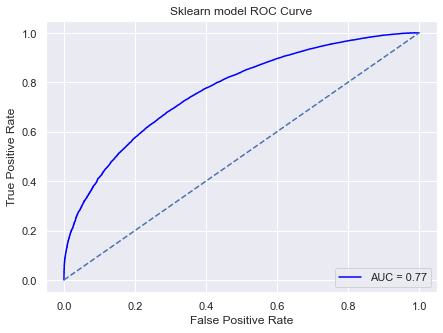

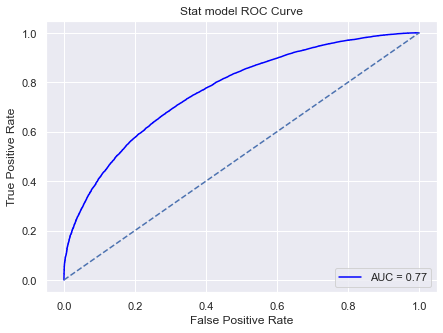

In [111]:
from sklearn.metrics import roc_curve, auc,precision_score, recall_score

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(7,5))
    plt.title(label)
    plt.plot(fpr,tpr, color='blue',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

#Sklearn
fpr, tpr, thresholds = roc_curve(Y_test, pos_probs)
roc_auc = auc(fpr, tpr)
#stats models
fpr1, tpr1, thresholds = roc_curve(Y_test, pred_sm)
roc_auc1 = auc(fpr1, tpr1)
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr,label='Sklearn model ROC Curve')
plot_roc_curve(fpr1, tpr1,label='Stat model ROC Curve')
plt.show();

* Since the results are similar , in case of both the models ,We have the same Area Under Curve for both the models ie; 0.77
* AUC value of 0.77 is accetable which is not too bad or too good

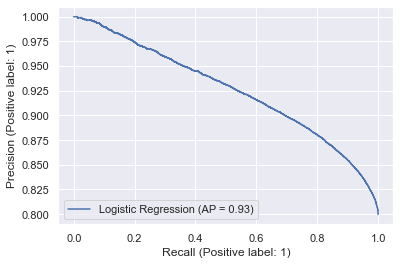

In [112]:
plot_precision_recall_curve(model1, X_test, Y_test, name = 'Logistic Regression')

In [113]:
def prcurve( probs, actuals, cuts = np.arange(0.05,0.95,0.05)):
    precision = np.zeros(len(cuts))
    recall = np.zeros(len(cuts))
    for i in np.arange(len(cuts)):
        y_preds = np.where(probs[:,1] > cuts[i],1,0)
        precision[i] = precision_score(actuals, y_preds)
        recall[i] = recall_score(actuals, y_preds)
    fig, ax = plt.subplots(figsize = [15,8])
    plt.plot(recall,precision , marker='o', linestyle='dashed', label = cuts )
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision Vs Recall curve ")
    for x,y,z in zip(recall,precision, cuts):
        label = "{:.2f}".format(z)
        plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,5),ha='center')
#return precision, recall, c

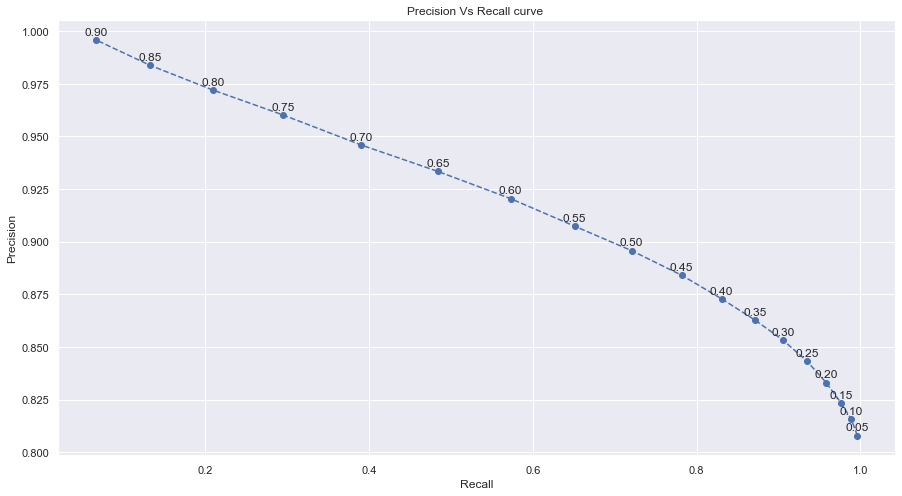

In [114]:
prcurve(yhat,Y_test)


### Tradeoff Questions:

#### * How can we make sure that our model can detect real defaulters and there are fewer false positives? 
#### * Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone. 

* It is very important for a bank to give finance to customers and to earn intrest in it and at the same time it has to make a safe and smart move while giving heavy loan amounts to customers
* The Data which has been provided is highly imbalanced data and model we have build  from the data could be biased.So that We cannot ensure the model always gives us perfect  and accurate predictions
* This False positives can be controlled by setting the cutoff value to as high as possible  and False Negitives can be controlled by setting the cutoff value to as low as possible
* From the above PR Curve there is a balance between precision and recall at range [0.35,0.4]
* By having the cutoff value to 0.35 has a kind of balance between false positives and negitives

In [118]:
Y_pred=[1 if i >= 0.35 else 0 for i in pos_probs]

In [119]:
confusion_matrix(Y_test, Y_pred)

array([[ 5457,  6761],
       [ 6249, 42468]], dtype=int64)

In [117]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.47      0.45      0.46     12218
           1       0.86      0.87      0.87     48717

    accuracy                           0.79     60935
   macro avg       0.66      0.66      0.66     60935
weighted avg       0.78      0.79      0.78     60935



## Recommendations:

* While issuing heavy loans ,Bank should ensure its safety by verify the source income of the customer thoroughly, should check their credit_history, should have any collateral and verify the value of collateral evaluated properly and dti ratio should be very low
* Banks can predict the credit worthiness of customer from dti percent,credit history,income_verification and no of open accounts
* Avoid giving loans to people who have high dti percentage,Open credit accounts and whose income source not verified
* For heavy loans banks should stop giving whole loan instead it can give some fractional part of loan based on dti and credit history
* For small and moderate loan amount,whole loan amount can be granted based on the credit worthiness of candidate